<a href="https://colab.research.google.com/github/HammadN98/Pos-Inteligencia-Artificial-e-Computacional/blob/main/Topicos-Especiais-IA/Topicos_Especiais_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
url_treino = 'https://raw.githubusercontent.com/HammadN98/Pos-Inteligencia-Artificial-e-Computacional/refs/heads/main/Topicos-Especiais-IA/dados/titanic/train.csv'
url_teste = 'https://raw.githubusercontent.com/HammadN98/Pos-Inteligencia-Artificial-e-Computacional/refs/heads/main/Topicos-Especiais-IA/dados/titanic/test.csv'
url_sub = 'https://raw.githubusercontent.com/HammadN98/Pos-Inteligencia-Artificial-e-Computacional/refs/heads/main/Topicos-Especiais-IA/dados/titanic/gender_submission.csv'

In [3]:
dados = pd.read_csv(url_treino)
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dados.shape

(891, 12)

## Pre-Processamento

In [5]:
dados.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
dados['Age'].median(), dados['Age'].min(), dados['Age'].max()

(28.0, 0.42, 80.0)

<Axes: >

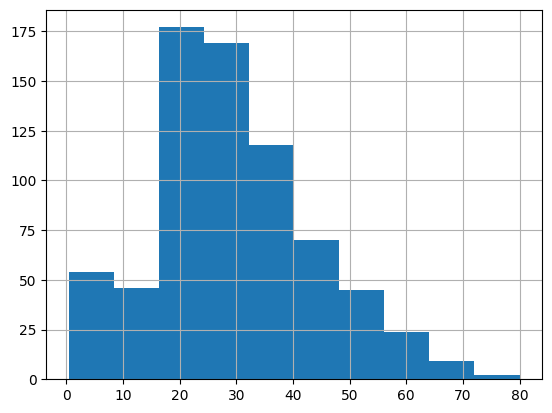

In [7]:
dados['Age'].hist()

COnsiderando que a distribuicao se assemelha a uma distribuicao normal, os dado faltantes serao imputados por sua mediana.

In [8]:
dados['Age'] = dados['Age'].fillna(dados['Age'].median())

### Embarked

Como sao poucos valores faltantes serao imputados pelo mais frequente.

In [9]:
dados['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [10]:
dados['Embarked'] = dados['Embarked'].fillna('S')

In [11]:
cattonum = {'S': 1,
            'C': 2,
            'Q': 3}
dados['Embarked'] = dados['Embarked'].replace(cattonum).astype(int)


<ipython-input-11-33838c92a823>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['Embarked'] = dados['Embarked'].replace(cattonum).astype(int)


### Cabin

A variavel da cabine tem quase 2/3 de valores ausentes. Porem antes de remover-la eu irei usar para criar uma variavel se possui cabine registrada ou nao.

In [12]:
dados['Cabine_verificada'] = dados['Cabin'].notnull().astype(int)

# Remover a coluna original
dados = dados.drop(columns=['Cabin'])

### Sex

In [14]:
encoder = OneHotEncoder(drop='first', sparse_output=False) #objeto

encoded = encoder.fit_transform(dados[['Sex']]) #Transformando a variuavel

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Sex'])) #Guardando as outras varivais, para hora do test

dados = dados.join(encoded_df).drop(columns=['Sex']) #Juntando tudo

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabine_verificada,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,1,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1.0


## Remocao

Variaveis que naop serao utilizadas.
- Name
- Ticket
- PassengerId

In [15]:
dados = dados.drop(columns=['PassengerId', 'Name', 'Ticket']) #variaveis nao numericas, ou Identificadoras

## Duplicando a base

Iremos copiar os dados, para manter duas bases, uma escalonado e outra nao. Cada qual para seu tipo de algoritimo.

In [20]:
dados_scaled = dados.copy()

scaler = StandardScaler() #Numeircas contginuas
dados_scaled[['Age', 'Fare', 'Pclass']] = scaler.fit_transform(dados_scaled[['Age', 'Fare', 'Pclass']])

In [21]:
dados_scaled.shape, dados.shape

((891, 9), (891, 9))

## Separando os dados

In [24]:
y = dados['Survived']

X_train = dados.drop(columns=['Survived'])
X_train_sc = dados_scaled.drop(columns=['Survived'])